# 15.0.Udemy_Computer_vision_Jospeh_Portilla_15_KERAS

## Deep Learning on Custom Images

### Housekeeping

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image 

In [7]:
cat1 = cv2.imread('/Users/pinky/Downloads/LEARNING/MY_DATA_SCIENCE/MY_DATA_SCIENCE/data/raw/Convolutional_Neural_Networks/dataset/training_set/cats/cat.1.jpg')

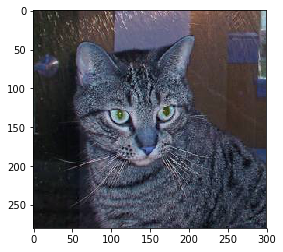

In [9]:
plt.imshow(cat1)

In [12]:
cat1.shape

(280, 300, 3)

In [26]:
dog1 = cv2.imread('../../data/raw/Convolutional_Neural_Networks/dataset/training_set/dogs/dog.1.jpg')

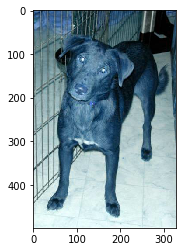

In [27]:
plt.imshow(dog1)

In [13]:
dog1.shape

(499, 327, 3)

### ImageDataGenerator

In [14]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
'''
Init signature: ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, 
                                   samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, 
                                   width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, 
                                   zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, 
                                   vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, 
                                   validation_split=0.0, dtype=None)

Signature: imageDataGenerator.flow_from_directory(directory, target_size=(256, 256), color_mode='rgb', classes=None, 
                                                  class_mode='categorical', batch_size=32, shuffle=True, seed=None, save_to_dir=None, 
                                                  save_prefix='', save_format='png', follow_links=False, subset=None, interpolation='nearest')

Signature: model.fit_generator(generator, steps_per_epoch=None, epochs=1, verbose=1, callbacks=None, validation_data=None, 
                                validation_steps=None, class_weight=None, max_queue_size=10, workers=1, use_multiprocessing=False, 
                                shuffle=True, initial_epoch=0)

'''

In [15]:
imageDataGenerator = ImageDataGenerator(rotation_range=30, width_shift_range=0.1, height_shift_range=0.1,  shear_range=0.2, 
                                        zoom_range=0.2,  fill_mode='nearest', cval=0.0, horizontal_flip=True, 
                                        vertical_flip=False, rescale=1/255)

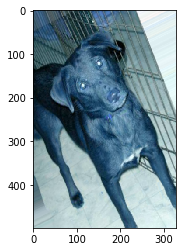

In [17]:
dog1_new = imageDataGenerator.random_transform(dog1)
plt.imshow(dog1_new)  # zoomed, horizontally flipped, rotated

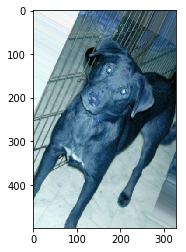

In [18]:
dog2_new = imageDataGenerator.random_transform(dog1)
plt.imshow(dog2_new)  # zoomed, rotated

### Building Keras Model

In [20]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Conv2D, MaxPool2D, Dense

In [24]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(150,150,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(150,150,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(150,150,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units=128))
model.add(Activation(activation='relu'))

model.add(Dropout(rate=0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 18496)             0         
__________

In [29]:
batch_size=16
trainingImageDataGenerator = imageDataGenerator.flow_from_directory(directory='../../data/raw/Convolutional_Neural_Networks/dataset/training_set', 
                                                                    target_size=(150,150), batch_size= batch_size, class_mode='binary')

Found 8000 images belonging to 2 classes.


In [30]:
testImageDataGenerator = imageDataGenerator.flow_from_directory(directory='../../data/raw/Convolutional_Neural_Networks/dataset/test_set', 
                                                                    target_size=(150,150), batch_size= batch_size, class_mode='binary')

Found 2000 images belonging to 2 classes.


In [31]:
trainingImageDataGenerator.class_indices

{'cats': 0, 'dogs': 1}

In [70]:
trainingImageDataGenerator.filenames[0:2]

['cats/cat.1.jpg', 'cats/cat.10.jpg']

In [36]:
trainingImageDataGenerator.samples

8000

In [37]:
trainingImageDataGenerator.total_batches_seen

0

In [ ]:
#epochs = 1 -> to save time
# steps_per_epoch = 150 -> Only 150 images considered per batch; 150 * 16 images considered per epoch
results = model.fit_generator(trainingImageDataGenerator, epochs=1, steps_per_epoch=150, 
                              validation_data= testImageDataGenerator, validation_steps=12) 

In [41]:
results.history #only one set of values as epochs=1

{'val_loss': [0.6796261370182037],
 'val_acc': [0.5208333333333334],
 'loss': [0.7008746290206909],
 'acc': [0.5083333333333333]}

In [43]:
results.history['acc']

[0.5083333333333333]

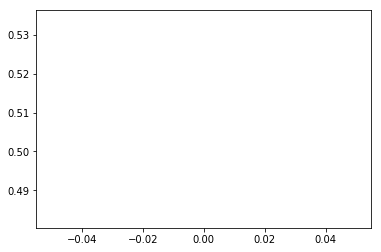

In [44]:
plt.plot(results.history['acc'])

### Using saved model from LAB Notes

In [45]:
from keras.models import load_model
lab_model = load_model('../../models/keras/LAB/cat_dog_100epochs.h5')

#### Prediction 1

In [47]:
dog_file = '../../data/raw/Convolutional_Neural_Networks/dataset/test_set/dogs/dog.4010.jpg'

In [51]:
from keras.preprocessing import image
dog_image = image.load_img(dog_file, target_size=(150,150))

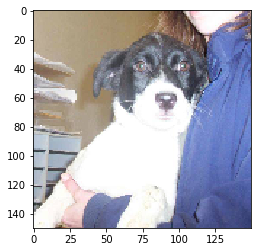

In [52]:
plt.imshow(dog_image)

In [53]:
dog_image.shape

AttributeError: 'Image' object has no attribute 'shape'

In [54]:
dog_image_array = image.img_to_array(dog_image)

In [55]:
dog_image_array.shape

(150, 150, 3)

In [56]:
dog_image_array_expanded = np.expand_dims(dog_image_array, axis=0)

In [57]:
dog_image_array_expanded.shape

(1, 150, 150, 3)

In [59]:
dog_image_array_expanded.min(), dog_image_array_expanded.max()

(10.0, 255.0)

In [58]:
dog_image_array_expanded_scaled = dog_image_array_expanded / 255

In [60]:
dog_image_array_expanded_scaled.min(), dog_image_array_expanded_scaled.max()

(0.039215688, 1.0)

In [63]:
lab_model.predict_classes(dog_image_array_expanded_scaled)  #  CORRECT PREDICTION using Lab model

array([[1]], dtype=int32)

In [64]:
lab_model.predict(dog_image_array_expanded_scaled)

array([[0.9438217]], dtype=float32)

In [65]:
model.predict_classes(dog_image_array_expanded_scaled)  #  WRONG PREDICTION using my model (beacuse epochs = 1)

array([[0]], dtype=int32)

In [66]:
model.predict(dog_image_array_expanded_scaled)

array([[0.49501038]], dtype=float32)

#### Prediction 2

In [68]:
dog_file = '../../data/raw/Convolutional_Neural_Networks/dataset/test_set/dogs/dog.4002.jpg'

from keras.preprocessing import image
dog_image = image.load_img(dog_file, target_size=(150,150))
dog_image_array = image.img_to_array(dog_image)  #dog_image_array.shape -> (150, 150, 3)
dog_image_array_expanded = np.expand_dims(dog_image_array, axis=0) #dog_image_array_expanded.shape -> (1, 150, 150, 3); # .min(), .max() --> (10.0, 255.0)
dog_image_array_expanded_scaled = dog_image_array_expanded / 255  # .min(), .max() --> (0.039215688, 1.0)
lab_model.predict_classes(dog_image_array_expanded_scaled)  #array([[1]], dtype=int32) #  CORRECT PREDICTION using Lab model
lab_model.predict(dog_image_array_expanded_scaled) #array([[0.9438217]], dtype=float32)

array([[0.9614663]], dtype=float32)

In [69]:
lab_model.predict_classes(dog_image_array_expanded_scaled)

array([[1]], dtype=int32)

In [71]:
#END